# Visualization

Descriptors on a set of given materials could be displayed as a heatmap.
By using this plotting, the descriptor-property relationships can be understand.
This tutorial will show how to draw a heatmap.

### useful functions

Run this cell will load some well-used packages such as `numpy`, `pandas`, and so on.
The running will also import some valuable functions which are written by ourselves.
There is no magic,  see `samples/tools.ipynb` to know what will be imported.

In [1]:
%run tools.ipynb

### draw elemental descriptors heatmap

We will use ``Composition`` descriptors and property ``density`` to demonstrate heatmap drawing step-by-step.

#### 1. calculate descriptors

In [2]:
# 1. calculate descriptors

from xenonpy.datatools import preset
from xenonpy.descriptor import Compositions

samples = preset.mp_samples
cal = Compositions()

descriptor = cal.transform(samples['composition'])
descriptor.head(5)

,ave:atomic_number,ave:atomic_radius,ave:atomic_radius_rahm,ave:atomic_volume,ave:atomic_weight,ave:boiling_point,ave:bulk_modulus,ave:c6_gb,ave:covalent_radius_cordero,ave:covalent_radius_pyykko,...,min:num_s_valence,min:period,min:specific_heat,min:thermal_conductivity,min:vdw_radius,min:vdw_radius_alvarez,min:vdw_radius_mm3,min:vdw_radius_uff,min:sound_velocity,min:Polarizability
mp-1008807,24.666667,174.067140,209.333333,25.666667,55.004267,1297.063333,72.868680,1646.90,139.333333,128.333333,...,1.0,2.0,0.360,0.02658,152.0,150.0,182.0,349.5,317.5,0.802
mp-1009640,33.000000,137.000000,232.500000,19.050000,77.457330,1931.200000,43.182441,1892.85,137.000000,123.500000,...,2.0,2.0,0.192,0.02583,155.0,166.0,193.0,360.6,333.6,1.100
mp-1016825,21.600000,153.120852,203.400000,13.920000,50.158400,1420.714000,76.663625,343.82,102.800000,96.000000,...,2.0,2.0,0.146,0.02658,152.0,150.0,182.0,302.1,317.5,0.802
mp-1017582,59.400000,139.000000,232.800000,11.020000,147.233694,4226.000000,150.200000,1037.58,137.600000,124.800000,...,1.0,2.0,0.133,13.00000,170.0,177.0,204.0,275.4,2475.0,1.670
mp-1021511,32.000000,140.500000,226.000000,14.300000,72.237000,877.912000,24.850000,272.50,124.500000,119.500000,...,2.0,3.0,0.232,0.20500,180.0,189.0,215.0,284.8,2310.0,2.900


#### 2. sort descriptors by property values

In [3]:
# use formation energy as our target
property_ = 'density'

# --- sort property 
prop = samples[property_].dropna()
sorted_prop = prop.sort_values()
sorted_prop.head(3)

# --- sort descriptors
sorted_desc = descriptor.loc[sorted_prop.index]
sorted_desc.head(3)

mp-754417    0.242136
mp-707454    0.584481
mp-569787    0.618365
Name: density, dtype: float64

,ave:atomic_number,ave:atomic_radius,ave:atomic_radius_rahm,ave:atomic_volume,ave:atomic_weight,ave:boiling_point,ave:bulk_modulus,ave:c6_gb,ave:covalent_radius_cordero,ave:covalent_radius_pyykko,...,min:num_s_valence,min:period,min:specific_heat,min:thermal_conductivity,min:vdw_radius,min:vdw_radius_alvarez,min:vdw_radius_mm3,min:vdw_radius_uff,min:sound_velocity,min:Polarizability
mp-754417,1.000000,79.000000,154.000000,14.100000,1.008000,20.280000,56.799640,6.510000,31.000000,32.000000,...,1.0,1.0,1.122728,0.18050,110.0,120.0,162.0,288.6,1270.0,0.666793
mp-707454,2.529412,86.529412,163.764706,14.794118,4.415529,98.300588,54.238542,93.583529,46.117647,47.117647,...,1.0,1.0,0.772948,0.02583,110.0,120.0,162.0,245.1,333.6,0.666793
mp-569787,2.500000,86.562500,168.875000,12.062500,4.469221,923.522500,107.349730,55.982500,46.562500,47.812500,...,1.0,1.0,0.900000,0.18050,110.0,120.0,162.0,288.6,1270.0,0.666793


#### 3. draw the heatmap

In [4]:
# --- import necessary libraries

from xenonpy.visualization import DescriptorHeatmap

DescriptorHeatmap(bc=True, col_cluster=True, col_colors=None,
         col_linkage=None, figsize=(70, 10), mask=None, method='average',
         metric='euclidean', pivot_kws=None, row_cluster=False,
         row_colors=None, row_linkage=None,
         save={'fname': 'heatmap_density', 'dpi': 200, 'bbox_inches': 'tight'})

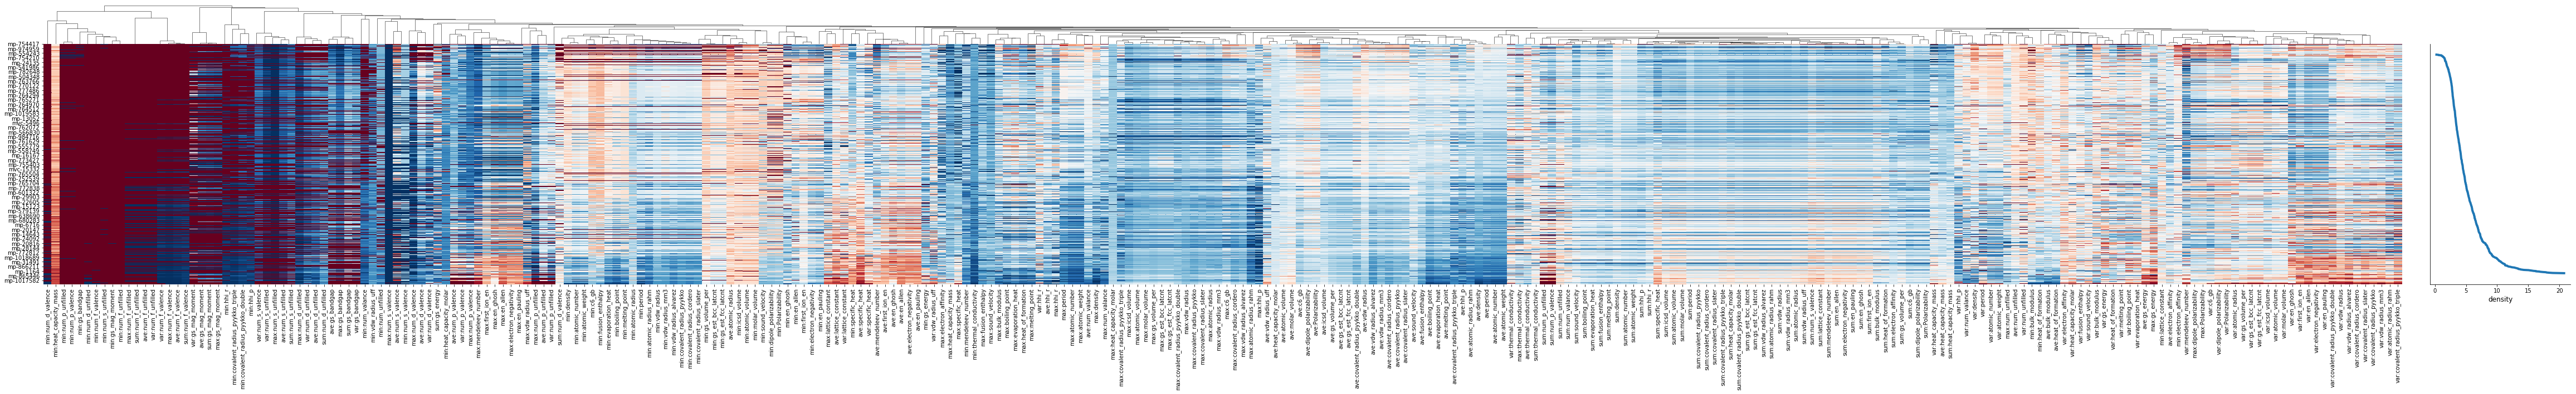

In [6]:
heatmap = DescriptorHeatmap( 
        bc=True,  # use box-cox transform 
        save=dict(fname='heatmap_density', dpi=200, bbox_inches='tight'),  # save fingure to file
        figsize=(70, 10))
heatmap.fit(sorted_desc)
heatmap.draw(sorted_prop)